### 선형회귀 실습

### 데이터셋 구축

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
score_df = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                       columns=['공부시간(x)','성적(y)'],
                       index=['해도','명훈','예호','영화'])
score_df

,공부시간(x),성적(y)
해도,2,20
명훈,4,40
예호,8,80
영화,9,90


# 모델링

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# 문제와 답 분리
X = score_df[['공부시간(x)']]
y = score_df['성적(y)']

In [5]:
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [6]:
print(linear_model.coef_) # 가중치 확인
print(linear_model.intercept_) # 절편 확인

[10.]
7.105427357601002e-15


### 가중치 변화에 따른 MSE 그래프 그리기

In [7]:
# 가설함수
def h(x,w) :
    return w*x + 0

In [8]:
h(score_df['공부시간(x)'],5)

해도    10
명훈    20
예호    40
영화    45
Name: 공부시간(x), dtype: int64

In [9]:
# Cost function(비용함수)
def MSE(x,w,y) : 
    y_pre = h(x,w) # 예측값 
    error = y_pre - y # 오차
    return (error ** 2).mean()

In [10]:
MSE(score_df['공부시간(x)'],11,score_df['성적(y)'])

41.25

In [11]:
mse_list = [] # 가중치 변화에 따른 mse가 들어갈 리스트
for w in range(21) :  #w를 0~20까지 변화
    mse = MSE(score_df['공부시간(x)'],w,score_df['성적(y)'])
    mse_list.append(mse)

In [12]:
import matplotlib.pyplot as plt

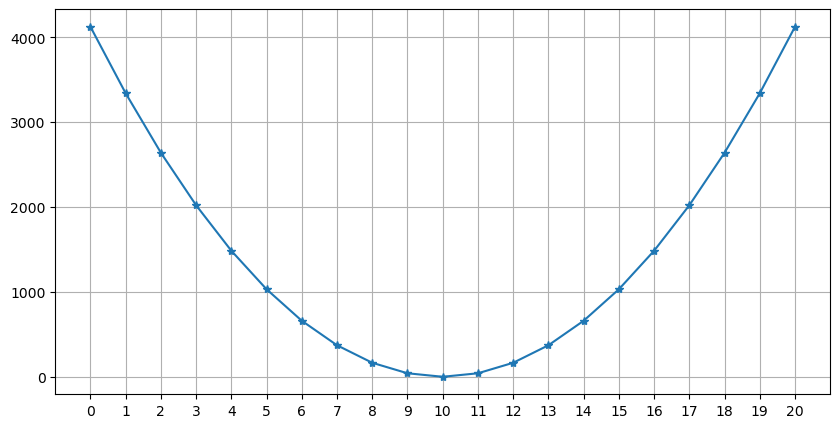

In [13]:
plt.figure(figsize = (10,5)) # 가로, 세로 크기설정
plt.plot(mse_list, marker = '*') # 라인그래프
plt.xticks(range(21)) # x축 눈금 표시
plt.grid() # 배경 격자
plt.show()

#### 경사하강법 모델 활용하기


In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
sgd_model = SGDRegressor(verbose=1, #학습과정 로그 출력
                        max_iter=1000, # 최대 반복 횟수
                        epsilon=0.1, # 반복을 멈추는 MSE값의 기준
                        eta0=0.01, # 학습률
                        n_iter_no_change=5) # MSE 값이 감소되지 않더라도 지켜보는 횟수

In [16]:
sgd_model.fit(X,y)

-- Epoch 1
Norm: 8.46, NNZs: 1, Bias: 1.235076, T: 4, Avg. loss: 904.396320
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.48, NNZs: 1, Bias: 1.358276, T: 8, Avg. loss: 21.977231
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.71, NNZs: 1, Bias: 1.381458, T: 12, Avg. loss: 1.679243
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.78, NNZs: 1, Bias: 1.386415, T: 16, Avg. loss: 0.335994
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.383616, T: 20, Avg. loss: 0.217163
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.80, NNZs: 1, Bias: 1.378491, T: 24, Avg. loss: 0.202548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.374127, T: 28, Avg. loss: 0.203541
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.82, NNZs: 1, Bias: 1.370656, T: 32, Avg. loss: 0.198236
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.365971, T: 36, Avg. loss: 0.197547
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(verbose=1)

In [17]:
sgd_model.coef_

array([9.84595885])

In [18]:
sgd_model.intercept_

array([1.10704815])

In [19]:
import pandas as pd
import numpy as np

In [20]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [21]:
boston_df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS","NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B","LSTAT"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
target_sr = pd.Series(target, name="MEDV")
target_sr

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, target_sr, test_size=0.2, random_state=823)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


# 단순 선형 회귀

<function matplotlib.pyplot.show(close=None, block=None)>

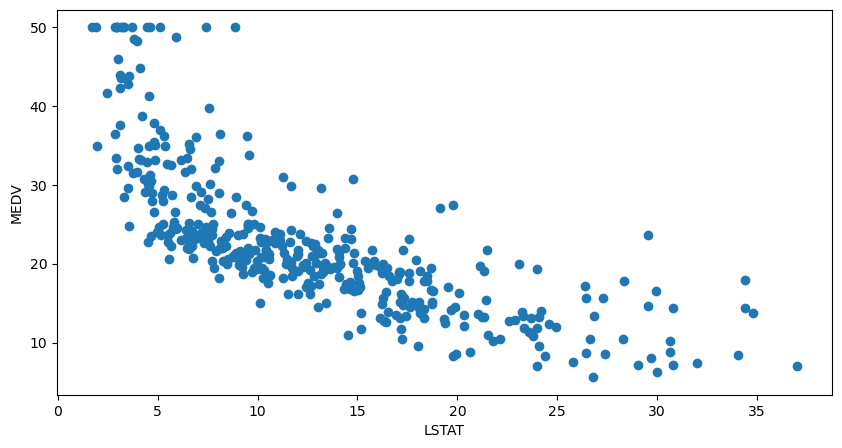

In [26]:
# LSTAT와 MEDV 사이의 관계를 그래프로 확인해보자
plt.figure(figsize=(10,5))
plt.scatter(X_train['LSTAT'],y_train)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show

In [27]:
house_linear = LinearRegression()
house_linear.fit(X_train[["LSTAT"]], y_train)

LinearRegression()

In [28]:
print(house_linear.coef_)
print(house_linear.intercept_)

[-0.96179679]
34.80022587064779


In [29]:
y_pre = house_linear.predict(np.arange(40).reshape(-1,1))

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
y_pre

array([34.80022587, 33.83842908, 32.87663229, 31.9148355 , 30.95303871,
       29.99124192, 29.02944513, 28.06764834, 27.10585155, 26.14405476,
       25.18225797, 24.22046118, 23.25866439, 22.2968676 , 21.33507081,
       20.37327402, 19.41147723, 18.44968044, 17.48788365, 16.52608686,
       15.56429007, 14.60249328, 13.64069649, 12.6788997 , 11.71710291,
       10.75530612,  9.79350933,  8.83171254,  7.86991575,  6.90811896,
        5.94632218,  4.98452539,  4.0227286 ,  3.06093181,  2.09913502,
        1.13733823,  0.17554144, -0.78625535, -1.74805214, -2.70984893])

<function matplotlib.pyplot.show(close=None, block=None)>

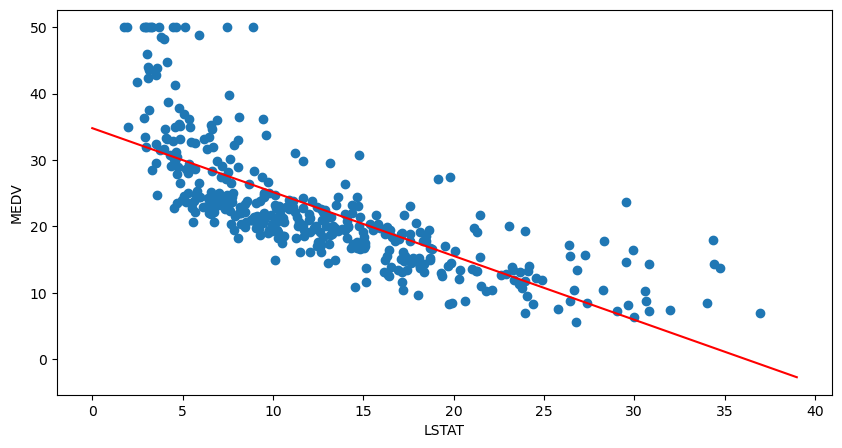

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(X_train['LSTAT'],y_train)
# 모델이 예측한 선을 시각화
plt.plot(y_pre, c='red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show

# 다항회귀

In [32]:
# 특성확장
# 단순 선형 회귀의 경우 직선형태로 예측선이 학습된다.
# 데이터 패턴에 따라 곡선의 예측선이 필요한 경우 특성을 확장하여 
# 다항회귀를 진행해 볼 수 있다.
boston_df['LSTAT * LSTAT']= boston_df['LSTAT']* boston_df['LSTAT']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, target_sr, test_size=0.2, random_state=823)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 14) (404,)
(102, 14) (102,)


In [35]:
# 확장된 특성을 추가하여 학습
house_linear2 = LinearRegression()
house_linear2.fit(X_train[["LSTAT","LSTAT * LSTAT"]], y_train)

LinearRegression()

In [36]:
y_pre2 = house_linear2.predict(X_test[["LSTAT", "LSTAT * LSTAT"]])

<function matplotlib.pyplot.show(close=None, block=None)>

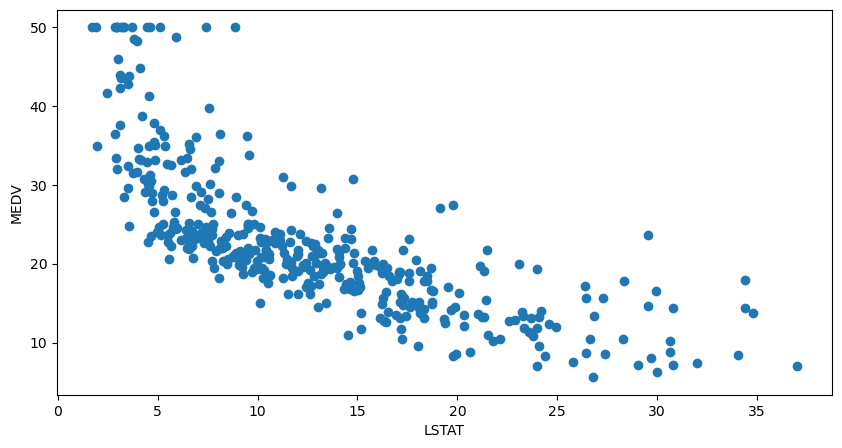

In [37]:
# LSTAT와 MEDV 사이의 관계를 그래프로 확인해보자
plt.figure(figsize=(10,5))
plt.scatter(X_train['LSTAT'],y_train)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show

In [38]:
data_df = pd.DataFrame(np.arange(40).reshape(-1,1))
data_df[1] = data_df ** 2
data_df

,0,1
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [39]:
y_pre2 = house_linear2.predict(data_df)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
y_pre2

array([43.35805823, 41.001018  , 38.73523212, 36.56070059, 34.47742341,
       32.48540057, 30.58463208, 28.77511795, 27.05685815, 25.42985271,
       23.89410162, 22.44960487, 21.09636247, 19.83437442, 18.66364072,
       17.58416137, 16.59593637, 15.69896571, 14.8932494 , 14.17878744,
       13.55557983, 13.02362657, 12.58292765, 12.23348309, 11.97529287,
       11.808357  , 11.73267548, 11.7482483 , 11.85507548, 12.053157  ,
       12.34249287, 12.72308309, 13.19492766, 13.75802657, 14.41237984,
       15.15798745, 15.99484941, 16.92296572, 17.94233638, 19.05296138])

<function matplotlib.pyplot.show(close=None, block=None)>

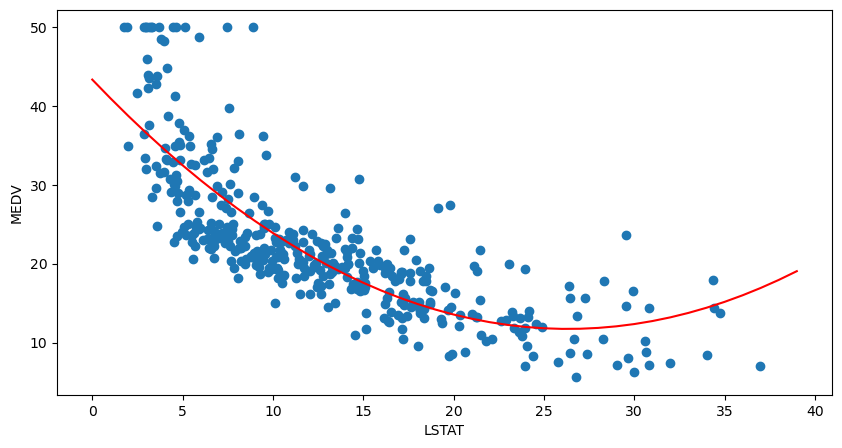

In [41]:
# LSTAT와 MEDV 사이의 관계를 그래프로 확인해보자
plt.figure(figsize=(10,5))
plt.scatter(X_train['LSTAT'],y_train)
plt.plot(y_pre2, c = 'red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show

### 규제 모델 사용하기
- LinearRegression  모델은 과대적합을 제어할 방법이 없다.
- 규제모델인 Ridge와 Lasso를 이용해 과대적합을 제어하자.

In [42]:
# 과대적합 유도하기 -> 특성확장 활용
colums_list = X_train.columns
for c_name1 in colums_list :
    for c_name2 in colums_list :
        X_train[c_name1+" * "+c_name2] = X_train[c_name1] * X_train[c_name2]

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_222784\1774406544.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[c_name1+" * "+c_name2] = X_train[c_name1] * X_train[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_222784\1774406544.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[c_name1+" * "+c_name2] = X_train[c_name1] * X_train[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_222784\1774406544.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

In [43]:
colums_list = X_test.columns
for c_name1 in colums_list :
    for c_name2 in colums_list :
        X_test[c_name1+" * "+c_name2] = X_test[c_name1] * X_test[c_name2]

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_222784\3604395118.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[c_name1+" * "+c_name2] = X_test[c_name1] * X_test[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_222784\3604395118.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[c_name1+" * "+c_name2] = X_test[c_name1] * X_test[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_222784\3604395118.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [44]:
print(X_train.shape)
print(X_test.shape)

(404, 208)
(102, 208)


In [46]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'LSTAT * LSTAT * CHAS', 'LSTAT * LSTAT * NOX', 'LSTAT * LSTAT * RM',
       'LSTAT * LSTAT * AGE', 'LSTAT * LSTAT * DIS', 'LSTAT * LSTAT * RAD',
       'LSTAT * LSTAT * TAX', 'LSTAT * LSTAT * PTRATIO', 'LSTAT * LSTAT * B',
       'LSTAT * LSTAT * LSTAT * LSTAT'],
      dtype='object', length=208)

In [47]:
from sklearn.linear_model import Ridge, Lasso

In [48]:
linear_model = LinearRegression()
ridge_model = Ridge() # L2
lasso_model = Lasso() # L1

In [49]:
# 학습
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+03, tolerance: 3.506e+00
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [52]:
# 평가
linear_score = linear_model.score(X_test, y_test)
ridge_score = ridge_model.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)

In [55]:
print("linear_score : " , linear_score)
print("ridge_score : " , ridge_score)
print("lasso_score : " , lasso_score)

linear_score :  0.45126296621536854
ridge_score :  0.7690183867746924
lasso_score :  0.7124789362511561
